In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1. survivers vs non survivers

In [7]:
surviver_unsurvivor_counts = df.groupby('Survived')
#surviver_unsurvivor_counts.count()
surviver_count = surviver_unsurvivor_counts.count()['PassengerId'].iloc[1]
unsurviver_count = surviver_unsurvivor_counts.count()['PassengerId'].iloc[0]
total_count = surviver_count + unsurviver_count
surviver_percentage = (surviver_count / (total_count))*100
unsurviver_percentage = (unsurviver_count / (total_count))*100
print('surviver : {}, unsuviver : {}'.format(surviver_count, unsurviver_count))
print('surviver_percentage : {}, unsurviver_percentage : {}'.format(surviver_percentage, unsurviver_percentage))

surviver : 342, unsuviver : 549
surviver_percentage : 38.38383838383838, unsurviver_percentage : 61.61616161616161


Text(0.5,1,'survived vs non survived fare avg')

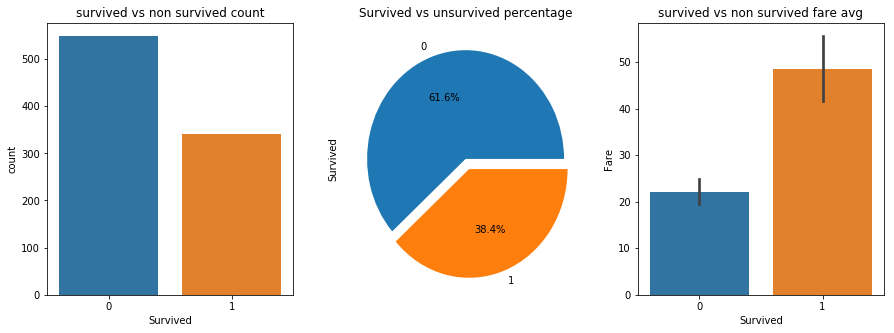

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x = 'Survived', data = df, ax = ax[0])
ax[0].set_title('survived vs non survived count')
df['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1])
ax[1].set_title('Survived vs unsurvived percentage')
sns.barplot(x="Survived", y="Fare", data = df, ax = ax[2])
ax[2].set_title('survived vs non survived fare avg')

# 2. Female vs male surviver

##### 1. Total Male counts vs Female counts

In [9]:
groupby_sex = df.groupby('Sex')
female_count = groupby_sex.count()['PassengerId'][0]
male_count = groupby_sex.count()['PassengerId'][1]
print('males : {}, females : {}'.format(male_count, female_count))

males : 577, females : 314


##### 2. Overall male  vs female surviver counts

In [10]:
groupby_sex_surviver = df.groupby(['Sex', 'Survived'])

In [11]:
groupby_sex_surviver.count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [12]:
female_survived_count = groupby_sex_surviver.count()['PassengerId'].loc['female'][1]
female_unsurvived_count = groupby_sex_surviver.count()['PassengerId'].loc['female'][0]
male_survived_count = groupby_sex_surviver.count()['PassengerId'].loc['male'][1]
male_unsurvived_count = groupby_sex_surviver.count()['PassengerId'].loc['male'][0]
print('Male survived : {}, Male unsurvived : {}'.format(male_survived_count, male_unsurvived_count))
print('Female survived : {}, Female unsurvived : {}'.format(female_survived_count, female_unsurvived_count))

Male survived : 109, Male unsurvived : 468
Female survived : 233, Female unsurvived : 81


Text(0.5,1,'Overall male vs female surviver counts')

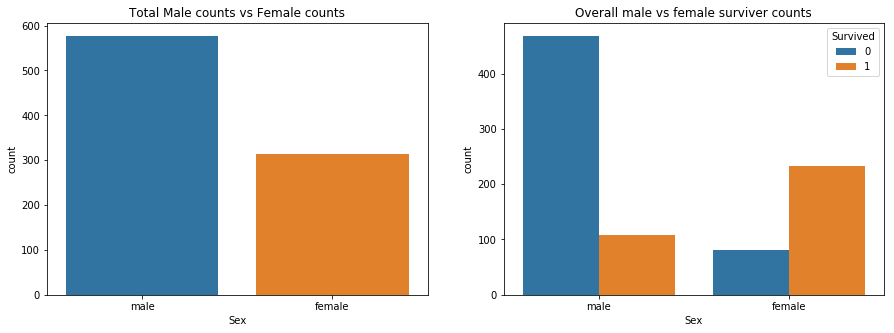

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x = 'Sex', data = df,  ax=ax[0])
ax[0].set_title('Total Male counts vs Female counts')
sns.countplot(x = 'Sex', hue = 'Survived', data = df, ax = ax[1])
ax[1].set_title('Overall male vs female surviver counts')

# 3. PClass

#### 1. counts of each class(survived vs unsurvived)

In [14]:
groupby_pclass = df.groupby('Pclass')
first_class_count = groupby_pclass.count()['PassengerId'].iloc[0]
second_class_count = groupby_pclass.count()['PassengerId'].iloc[1]
third_class_count = groupby_pclass.count()['PassengerId'].iloc[2]
print('First class : {}, Second class :{}, Third class: {}'.format(first_class_count, second_class_count, third_class_count))
groupby_pclass.count()

First class : 216, Second class :184, Third class: 491


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [15]:
groupby_pclass_sex = df.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId']
groupby_pclass_sex.count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: PassengerId, dtype: int64

Text(0.5,1,'counts of each class(survived vs unsurvived)')

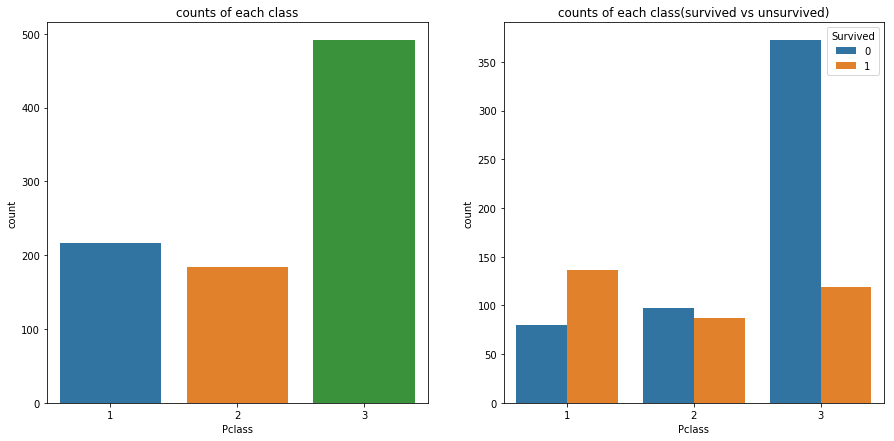

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x = 'Pclass', data = df, ax = ax[0])
ax[0].set_title('counts of each class')

sns.countplot(x = 'Pclass', hue = 'Survived', data = df, ax=ax[1])
ax[1].set_title('counts of each class(survived vs unsurvived)')


In [17]:
pd.crosstab(index = [df.Sex, df.Survived], columns=df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

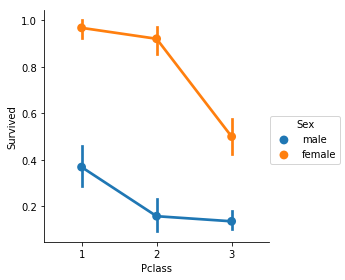

In [18]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

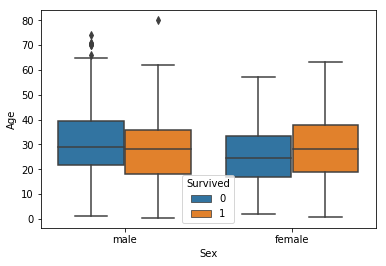

In [19]:
sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df)

Text(0.5,1,'Sex and Pclass Vs surviver')

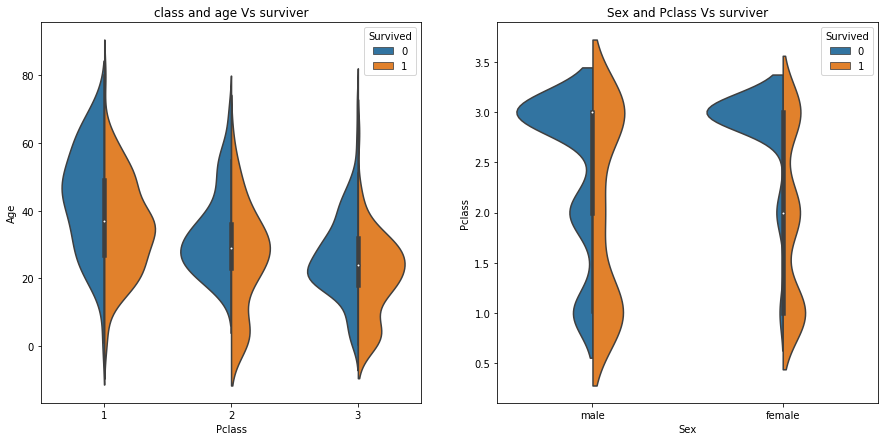

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', split=True, data = df, ax = ax[0])
ax[0].set_title('class and age Vs surviver')

sns.violinplot(x = 'Sex', y = 'Pclass', hue = 'Survived', split=True, data = df, ax = ax[1])
ax[1].set_title('Sex and Pclass Vs surviver')

In [21]:
df['Initial'] = 0

In [22]:
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

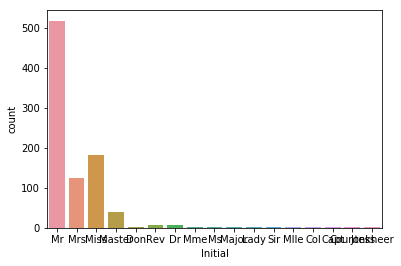

In [23]:
sns.countplot(x = 'Initial', data = df, dodge=True)

In [24]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [26]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [27]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [28]:
df['Age'].isnull().sum()

0

# Surviver vs non surviver histogram

Text(0.5,1,'Histogram for unsurviver(0)')

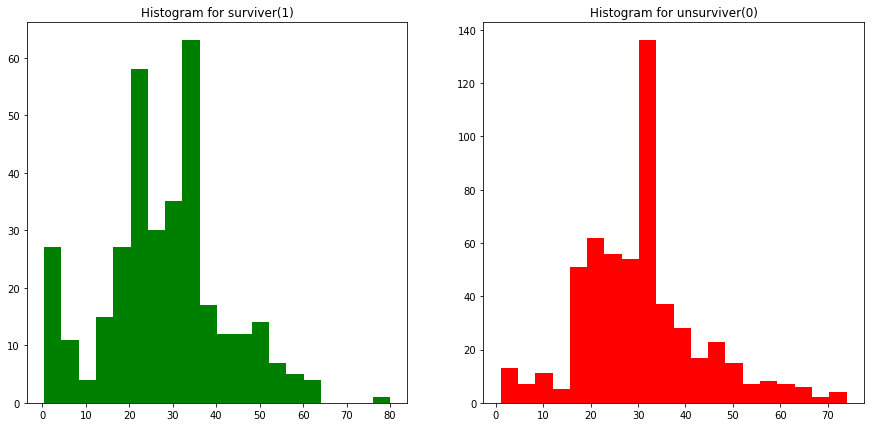

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].hist(x = df[df['Survived'] == 1]['Age'],bins = 20, color = 'Green',)
ax[0].set_title('Histogram for surviver(1)')

ax[1].hist(x = df[df['Survived'] == 0]['Age'],bins = 20, color = 'Red')
ax[1].set_title('Histogram for unsurviver(0)')

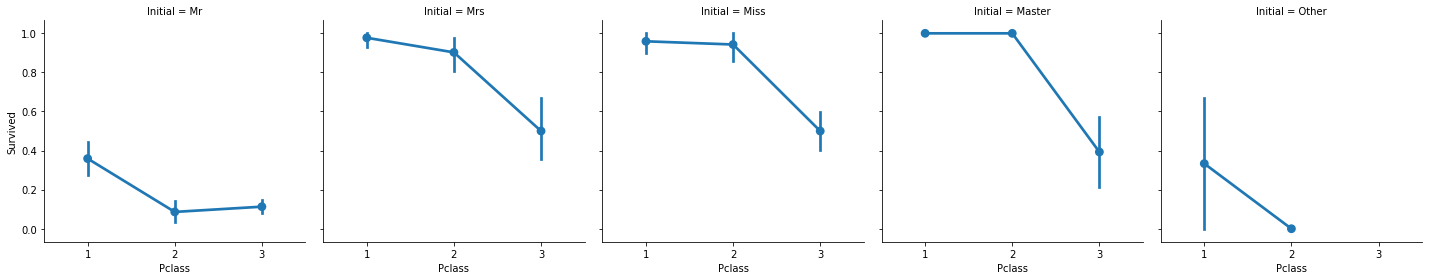

In [30]:
sns.factorplot(x = 'Pclass', y = 'Survived', col = 'Initial', data = df)
plt.show()

### Embarked

In [31]:
pd.crosstab(index = [df.Embarked, df.Pclass], columns= [df.Sex, df.Survived], margins = True).style.background_gradient(cmap='summer_r')

In [32]:
pd.crosstab(index = [df.Embarked, df.Pclass], columns= [df.Survived], margins = True).style.background_gradient(cmap='summer_r')

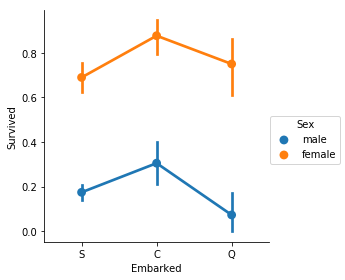

In [33]:
sns.factorplot(x= 'Embarked', y = 'Survived', hue = 'Sex', data = df)

In [34]:
df['Embarked'].isnull().sum()

2

In [35]:
df['Embarked'].fillna('S', inplace = True)

In [36]:
df['Embarked'].isnull().any()

False

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [38]:
pd.crosstab(index=[df.SibSp, df.Pclass], columns=[df.Survived], margins=True)

Survived        0    1  All
SibSp Pclass               
0     1        60   77  137
      2        70   50  120
      3       268   83  351
1     1        18   53   71
      2        23   32   55
      3        56   27   83
2     1         1    4    5
      2         4    4    8
      3        10    5   15
3     1         1    2    3
      2         0    1    1
      3        11    1   12
4     3        15    3   18
5     3         5    0    5
8     3         7    0    7
All           549  342  891

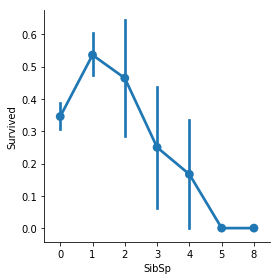

In [39]:
sns.factorplot(x = 'SibSp', y = 'Survived', data=df)

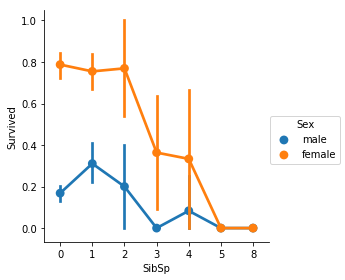

In [40]:
sns.factorplot(x = 'SibSp', y = 'Survived', hue='Sex', data=df)

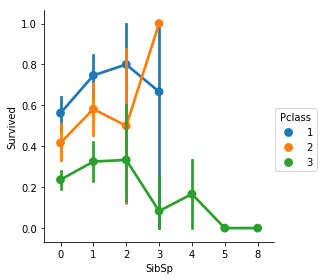

In [41]:
sns.factorplot(x = 'SibSp', y = 'Survived', hue = 'Pclass', data=df)

In [42]:
df['Parch'].isnull().any()

False

In [43]:
pd.crosstab(index = df.Parch, columns=[df.Pclass], margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


# Part2: Feature Engineering and Data Cleaning

In [44]:
df['Age_band'] = 0
df.loc[df['Age'] <= 16, 'Age_band'] = 0
df.loc[(df['Age'] > 16) & (df['Age']<= 32), 'Age_band'] = 1
df.loc[(df['Age'] > 32) & (df['Age']<= 48), 'Age_band'] = 2
df.loc[(df['Age'] > 48) & (df['Age']<= 64), 'Age_band'] = 3
df.loc[df['Age']>64,'Age_band']=4
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [45]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


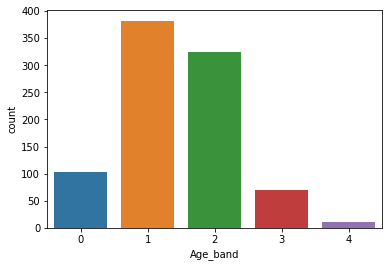

In [46]:
sns.countplot(x = 'Age_band', data = df)

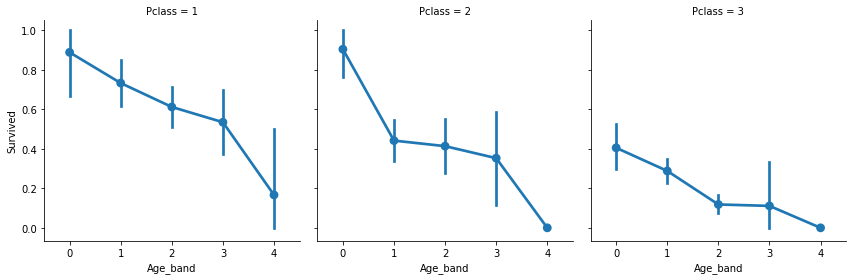

In [47]:
sns.factorplot(x = 'Age_band', y = 'Survived', data = df, col = 'Pclass')

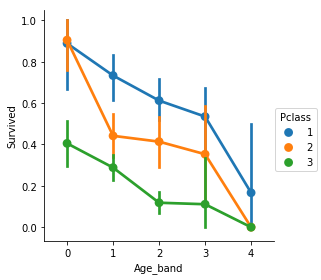

In [48]:
sns.factorplot(x = 'Age_band', y = 'Survived', data = df, hue = 'Pclass')

In [49]:
df['Fare_range'] = pd.qcut(df.Fare, 4)

In [50]:
df.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [51]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.91,'Fare_cat']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_cat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_cat']=3

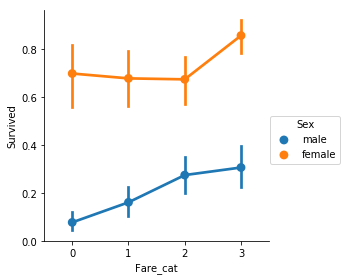

In [52]:
sns.factorplot(x = 'Fare_cat', y= 'Survived', hue ='Sex', data = df)
plt.show()

In [53]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

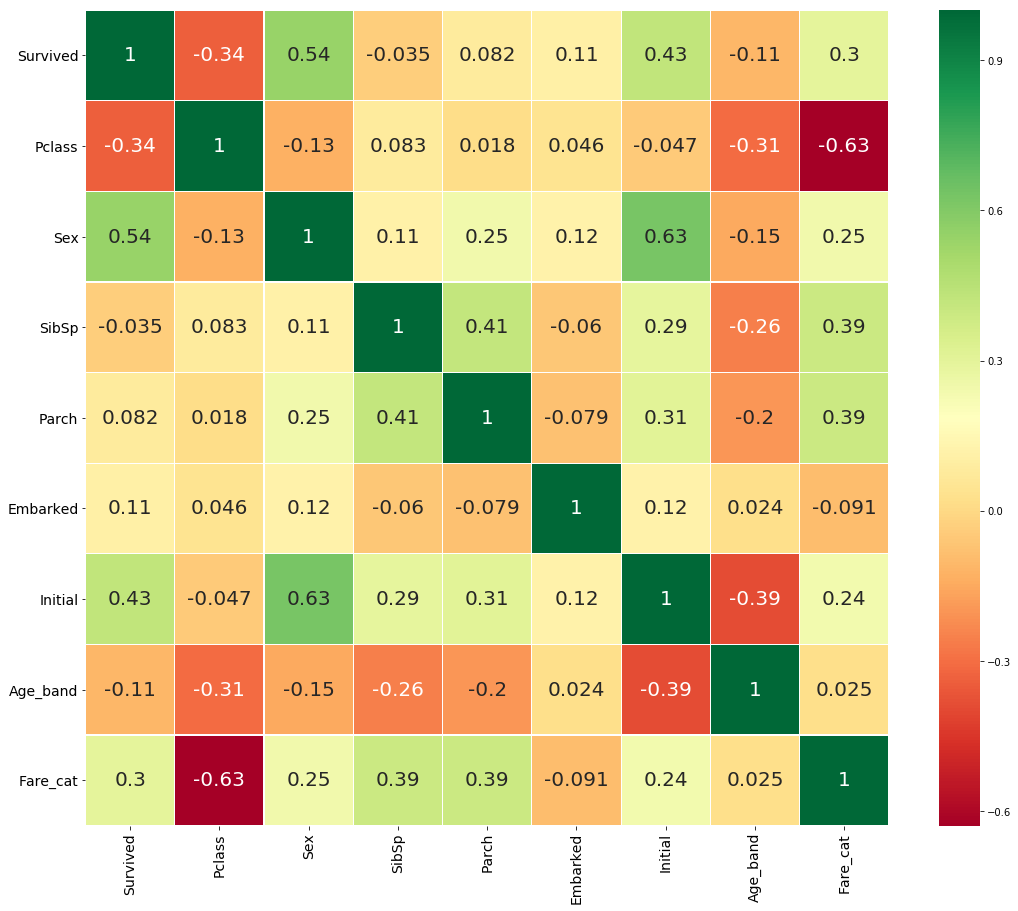

In [54]:
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [55]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cat
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


# Part3: Predictive Modeling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [57]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cat
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


In [58]:
X = df.iloc[:,1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Radial Support Vector Machines(rbf-SVM)

In [59]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, y_train)
predict_rsvm = model.predict(X_test)
print('Predict accuracy is ',metrics.accuracy_score(predict_rsvm,y_test))

Predict accuracy is  0.8169491525423729


### linear Support Vector Machines(linear-SVM)


In [60]:
model = svm.SVC(kernel = 'linear',C=0.1,gamma=0.1)
model.fit(X_train, y_train)
predict_linear_svm = model.predict(X_test)
print('Predict accuracy is ',metrics.accuracy_score(predict_linear_svm,y_test))

Predict accuracy is  0.7694915254237288


### Logistic Regression

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction_logistic_regression = model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_logistic_regression,y_test))

The accuracy of the Logistic Regression is 0.8


### Decision Tree

In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction_decision_tree = model.predict(X_test)
print('The accuracy of Decision Tree is', metrics.accuracy_score(prediction_decision_tree, y_test))

The accuracy of Decision Tree is 0.8305084745762712


### K-Nearest Neighbours(KNN)

In [63]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
prediction_knn = model.predict(X_test)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the KNN is 0.8135593220338984


### Gaussian Naive Bayes

In [64]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction_gnb = model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction_gnb,y_test))

The accuracy of the NaiveBayes is 0.7898305084745763


### Random Forests

In [65]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
prediction_random_forest = model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction_random_forest,y_test))

The accuracy of the Random Forests is 0.823728813559322


### Confusion Matrix

Text(0.5,1,'Matrix for Naive Bayes')

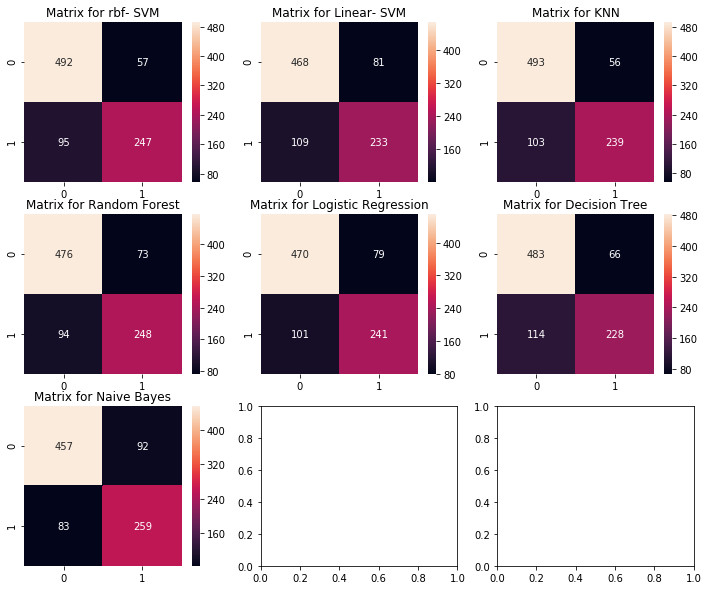

In [66]:
from sklearn.model_selection import cross_val_predict #prediction
f, ax = plt.subplots(3,3, figsize =(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0][0], annot=True, fmt='2.0f')
ax[0][0].set_title('Matrix for rbf- SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0][1], annot=True, fmt='2.0f')
ax[0][1].set_title('Matrix for Linear- SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0][2], annot=True, fmt='2.0f')
ax[0][2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1][0], annot=True, fmt='2.0f')
ax[1][0].set_title('Matrix for Random Forest')

y_pred = cross_val_predict(LogisticRegression(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1][1], annot=True, fmt='2.0f')
ax[1][1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1][2], annot=True, fmt='2.0f')
ax[1][2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[2][0], annot=True, fmt='2.0f')
ax[2][0].set_title('Matrix for Naive Bayes')

# Ensemble Learning

##            Voting

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
ensemble_lin_rbf = VotingClassifier(estimators=[
                    ('KNN', KNeighborsClassifier(n_neighbors=10)),
                    ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                    ('RFOR', RandomForestClassifier(n_estimators=500, random_state=0 )),
                    ('LR', LogisticRegression(C= 0.5)),
                    ('DT', DecisionTreeClassifier(random_state=0) ),
                    ('NB', GaussianNB()),
                    ('svb', svm.SVC(kernel='linear', probability=True))
                    ],
                    voting = 'soft').fit(X_train, y_train)
print('Accuracy of model is ', ensemble_lin_rbf.score(X_test, y_test))
#rint('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

Accuracy of model is  0.8135593220338984
The cross validated score is 0.8248899103393486


### Bagged KNN

In [83]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy of bagged KNN is :', metrics.accuracy_score(prediction, y_test))
result = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

Accuracy of bagged KNN is : 0.8305084745762712
The cross validated score for bagged KNN is: 0.8205331403926909


### Bagged Decision

In [85]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy of bagged KNN is :', metrics.accuracy_score(prediction, y_test))
result = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

Accuracy of bagged KNN is : 0.847457627118644
The cross validated score for bagged KNN is: 0.8216573033707864


##  AdaBoost(Adaptive Boosing)

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, y, cv = 10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8260762115537397


## XGBoost

In [96]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, y, cv = 10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8126926569061401


In [97]:
from sklearn.model_selection import GridSearchCV
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1]
hyper ={
    'n_estimators': n_estimators,
    'learning_rate': learn_rate
}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:  6.5min finished


0.8237934904601572
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


#### confustion matrix for the Best Model

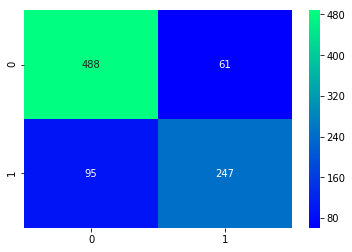

In [99]:
ada = AdaBoostClassifier(n_estimators=200, random_state=1, learning_rate=0.05)
result = cross_val_predict(ada, X, y, cv = 10)
sns.heatmap(confusion_matrix(y, result), cmap = 'winter', annot=True, fmt = '2.0f')

Text(0.5,1,'Feature Importance in XgBoost')

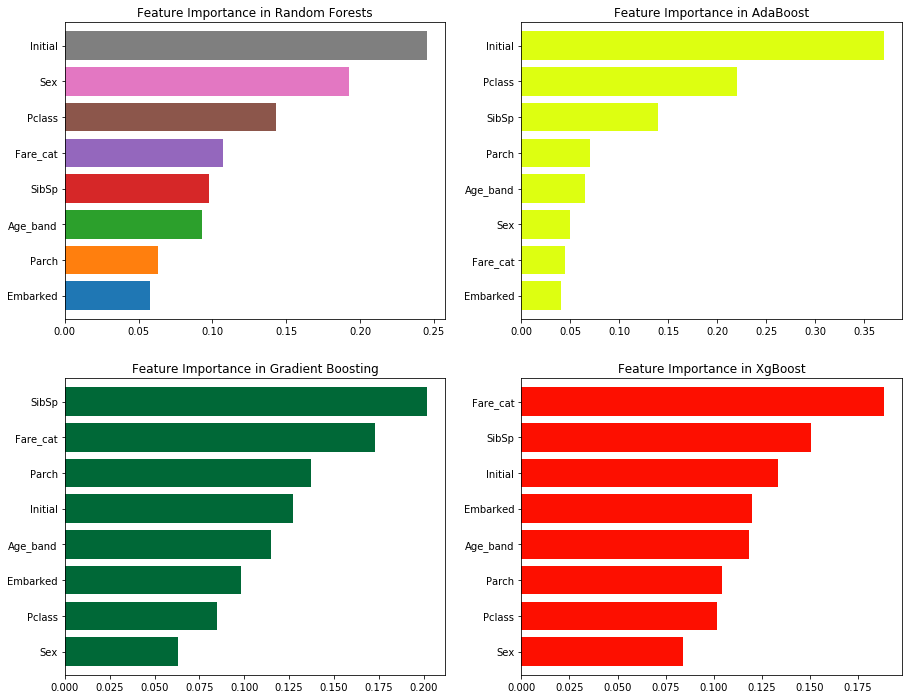

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
X=df[df.columns[1:]]
y=df['Survived']

f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')